In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
import umap

In [ ]:
# define compounds in scope as a dictionary

scope_compounds_dict = {
    "8a": "EN300-20027",
    "8b": "EN300-18989",
    "8c": "AJC001",
    "8d": "EN300-13206",
    "8e": "EN300-16958",
    "8f": "EN300-20348",
    "8g": "EN300-62688",
    "8h": "AJC002",
    "8i": "EN300-43319",
    "8j": "EN300-61954",
    "8k": "EN300-39266",
    "8l": "AJC003",
    "8m": "EN300-49064",
    "8n": "EN300-18739",
    "8o": "EN300-77249",
    "8p": "EN300-12163",
    "8q": "EN300-19571",
    "8r": "EN300-20439",
    "8s": "EN300-75686",
    "8t": "AJC004",
    "8u": "EN300-41781",
    "8v": "EN300-21136",
    "8w": "EN300-7578636",
    "8x": "EN300-19392",
    "8y": "EN300-20438",
    "12": "AJC005"
}

In [3]:
fingerprint_df = pd.read_csv('enamine_primary_amines_1024bit_fingerprints.csv', index_col=0).drop(columns=['SMILES'])
descriptor_df = pd.read_csv('enamine_primary_amines_space_descriptors.csv', index_col=0)

In [ ]:
# generate a scaled dataframe of the descriptors
scaler = StandardScaler()
scaled_descriptors = scaler.fit_transform(descriptor_df)
scaled_descriptor_df = pd.DataFrame(scaled_descriptors, index=descriptor_df.index, columns=descriptor_df.columns)

In [5]:
scaled_descriptor_df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,...,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,MolLogP
Catalog_ID,,,,,,,,,,,,,,,,,,,,,
EN300-16708,0.444093,-0.903310,-0.078573,-0.890259,-0.761741,0.563164,1.249238,1.488892,1.100620,0.734748,...,0.826587,1.215348,1.866943,-0.969854,-0.263036,-0.042634,-0.787162,-0.312650,-1.432909,0.049772
EN300-02528,-1.051313,2.061161,0.892060,-0.244314,-0.648435,0.723762,-0.479680,-1.840929,-0.774564,0.331938,...,0.259409,-0.086007,-0.424913,1.047738,-0.193965,-0.580489,-0.787162,-0.312650,-1.432909,2.005525
EN300-06825,-0.198053,0.865528,0.688171,-2.209956,-0.804497,-0.082771,-0.351565,0.656437,0.751748,0.734748,...,2.391299,-0.653030,1.995911,-0.436617,-0.193965,-0.580489,-0.787162,-0.312650,-1.432909,1.076635
EN300-07837,1.278146,-0.168750,-2.186917,0.202596,-0.245415,4.446500,0.611945,-1.998808,-2.015163,-1.468327,...,-0.451797,-0.062244,-0.678981,1.073680,0.648219,-0.580489,2.945690,-1.667957,-0.098223,1.199694
EN300-07654,-1.295001,-0.686033,0.423588,-1.519927,-0.786173,-1.739442,1.253636,0.775359,0.801587,-0.466177,...,-0.451797,-0.774951,1.024779,-0.968352,0.289441,-0.580489,0.019131,-0.312650,-0.394820,-1.165855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AJC001,0.548614,-0.809105,0.180789,-0.967767,-0.457692,-1.118234,1.203705,1.720129,0.984329,0.267721,...,-0.451797,0.809780,-0.678981,-0.810562,-0.403066,-0.460548,1.122239,-0.312650,1.162313,-0.876977
AJC002,0.893744,-0.283856,0.043696,-0.266879,0.181353,0.219894,2.152477,-0.205749,-0.843092,-0.906516,...,-0.451797,1.224734,-0.678981,-0.801301,-0.193965,0.005313,2.594991,-0.312650,1.369931,0.058706
AJC003,0.777155,-0.627449,0.043783,-0.789279,0.111924,-0.323319,2.153502,0.448323,-0.294866,-0.759736,...,-0.451797,1.153793,-0.678981,-0.925820,-0.193965,-0.680014,2.466621,-0.312650,1.292074,-0.631424


In [6]:
# combine the fingerprint and descriptor dataframes
df = pd.concat([fingerprint_df, scaled_descriptor_df], axis=1).dropna()

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,MolLogP
Catalog_ID,,,,,,,,,,,,,,,,,,,,,
EN300-16708,0,0,0,0,0,0,0,0,0,0,...,0.826587,1.215348,1.866943,-0.969854,-0.263036,-0.042634,-0.787162,-0.312650,-1.432909,0.049772
EN300-02528,0,0,0,0,0,0,0,0,0,0,...,0.259409,-0.086007,-0.424913,1.047738,-0.193965,-0.580489,-0.787162,-0.312650,-1.432909,2.005525
EN300-06825,0,0,0,0,0,0,0,0,0,0,...,2.391299,-0.653030,1.995911,-0.436617,-0.193965,-0.580489,-0.787162,-0.312650,-1.432909,1.076635
EN300-07837,0,0,0,0,0,0,0,0,0,0,...,-0.451797,-0.062244,-0.678981,1.073680,0.648219,-0.580489,2.945690,-1.667957,-0.098223,1.199694
EN300-07654,0,0,0,0,0,0,0,0,0,0,...,-0.451797,-0.774951,1.024779,-0.968352,0.289441,-0.580489,0.019131,-0.312650,-0.394820,-1.165855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AJC001,0,1,0,0,0,0,0,0,0,0,...,-0.451797,0.809780,-0.678981,-0.810562,-0.403066,-0.460548,1.122239,-0.312650,1.162313,-0.876977
AJC002,0,0,0,0,0,0,0,0,0,1,...,-0.451797,1.224734,-0.678981,-0.801301,-0.193965,0.005313,2.594991,-0.312650,1.369931,0.058706
AJC003,0,0,0,0,0,0,0,0,0,1,...,-0.451797,1.153793,-0.678981,-0.925820,-0.193965,-0.680014,2.466621,-0.312650,1.292074,-0.631424


In [ ]:
# geneate the UMAP on the combined dataframe
umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=30, min_dist=0.1)
umap_reduced_features = umap_reducer.fit_transform(df)
df['UMAP1'] = umap_reduced_features[:, 0]
df['UMAP2'] = umap_reduced_features[:, 1]

/Users/jac340/envs/general/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/jac340/envs/general/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


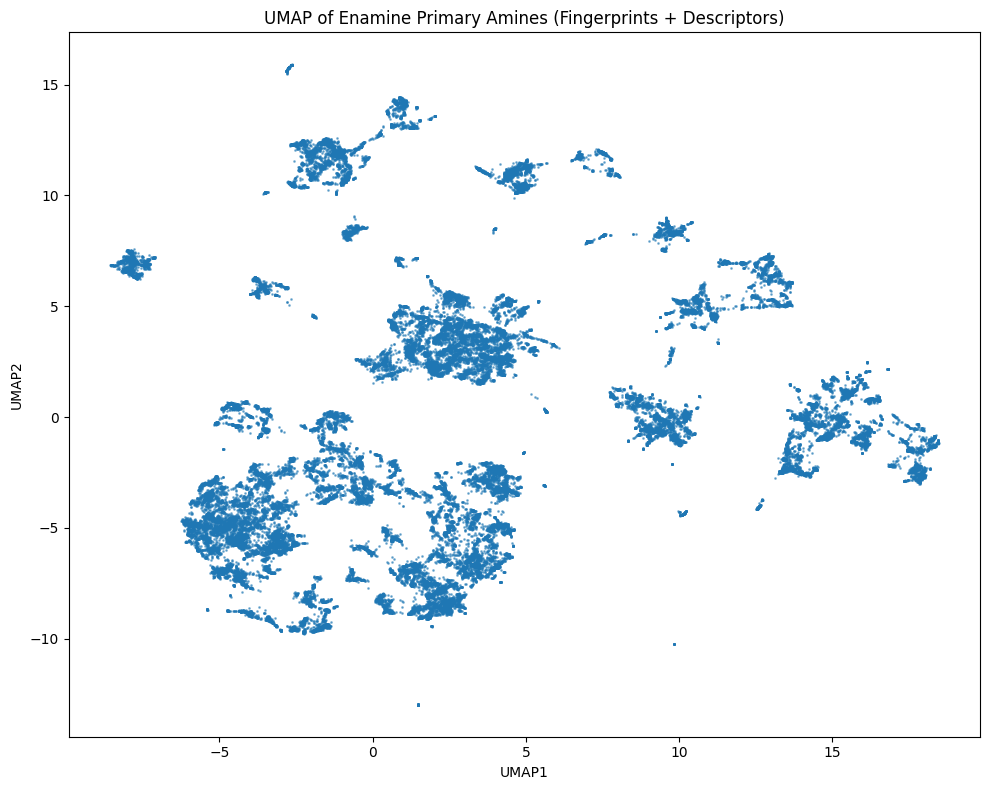

In [9]:
# plot the umap space

plt.figure(figsize=(10, 8))
plt.scatter(df['UMAP1'], df['UMAP2'], s=1, alpha=0.5)
plt.title('UMAP of Enamine Primary Amines (Fingerprints + Descriptors)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

plt.tight_layout()
plt.show()

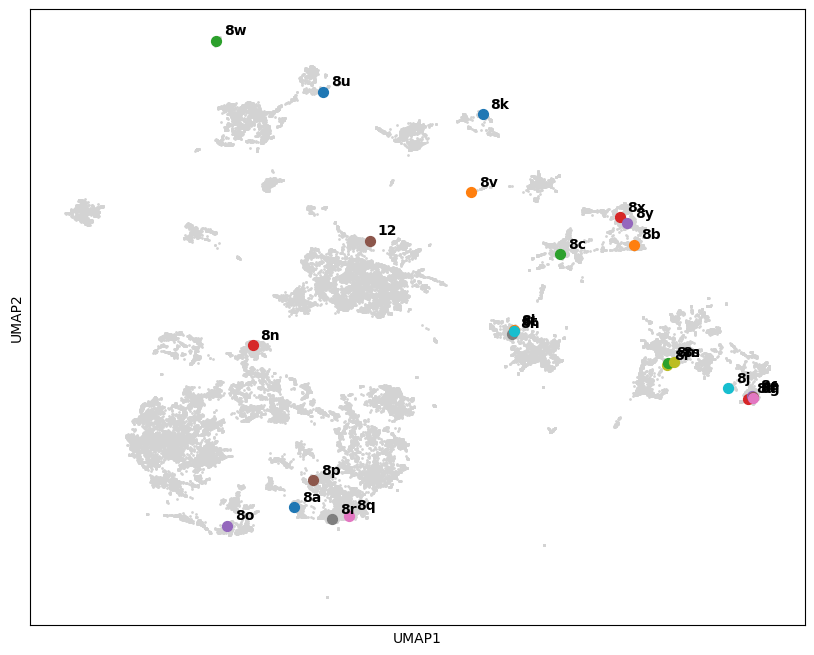

In [50]:
# show the space with the scope compounds highlighted

plt.figure(figsize=(10, 8))
plt.scatter(df['UMAP1'], df['UMAP2'], s=1, color='lightgrey')   
for label, enamine_id in scope_compounds_dict.items():
    if enamine_id in df.index:
        plt.scatter(df.loc[enamine_id, 'UMAP1'], df.loc[enamine_id, 'UMAP2'], s=50, label=label)
        plt.text(
            df.loc[enamine_id, 'UMAP1']+0.3,
            df.loc[enamine_id, 'UMAP2']+0.3,
            label,
            fontweight='bold'
        )

plt.xticks([])
plt.yticks([])

plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
# plt.title('Chemical Space of Enamine Primary Amines with Scope Compounds Highlighted')
plt.show()

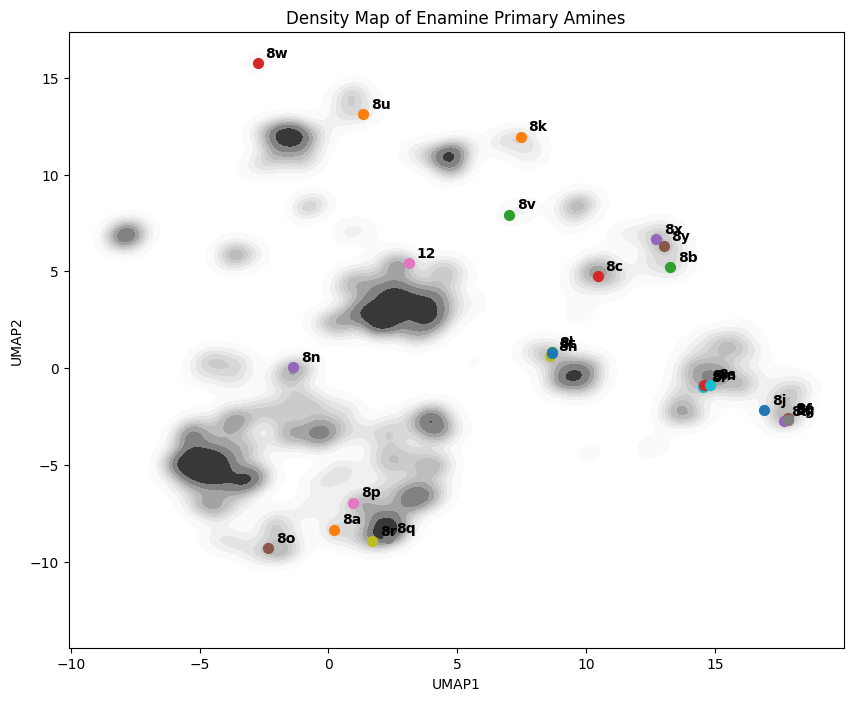

In [12]:
# view the umap as a kde density map
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df['UMAP1'], y=df['UMAP2'], fill=True, cmap='Grays', bw_adjust=0.5)
plt.title('Density Map of Enamine Primary Amines')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

for label, enamine_id in scope_compounds_dict.items():
    if enamine_id in df.index:
        plt.scatter(df.loc[enamine_id, 'UMAP1'], df.loc[enamine_id, 'UMAP2'], s=50, label=label)
        plt.text(
            df.loc[enamine_id, 'UMAP1']+0.3,
            df.loc[enamine_id, 'UMAP2']+0.3,
            label,
            fontweight='bold'
        )

plt.show()

In [13]:
# export df
df.to_csv('enamine_primary_amines_fingerprints_descriptors_umap.csv')